#### Sampling the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

random_seed=216
mean1 = np.array([1,1])
mean2 = np.array([4,4])
cov = np.array([[1, 0], [0, 2]])
x1 = multivariate_normal(cov = cov, mean = mean1, seed = random_seed)
x2 = multivariate_normal(cov = cov, mean = mean2, seed = random_seed)
data1 = x1.rvs(size = 50)
data2 = x2.rvs(size= 50)

#### Importing the data to the data frame

In [2]:
import pandas as pd

df1 = pd.DataFrame(data1, columns = ['x1','x2'])
df2 = pd.DataFrame(data2, columns = ['x1','x2'])
df = pd.concat([df1, df2])
y_val1 = np.zeros(50)
y_val2 = np.ones(50)
y_val = np.concatenate((y_val1, y_val2))
df["y"] = y_val
df["y"] = pd.Categorical(df["y"])
df["y"] = df["y"].cat.codes

#### Seprating the input and the output

In [3]:
y = df["y"]
df_x = df.copy()
df_x = df_x.drop(["y"], axis = 1)
X = df_x

#### Splitting the data randomly in 75:25

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size= 0.75, test_size =0.25)

#### Fitting the linear regression model

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
b0 = lin_reg.intercept_
b1, b2 = lin_reg.coef_

#### Training and Testing error

In [6]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
print(f"Accuracy: {100-round((mean_squared_error(y_pred,y_test)*100),6)}%")

Accuracy: 95.853629%


#### Plotting the model

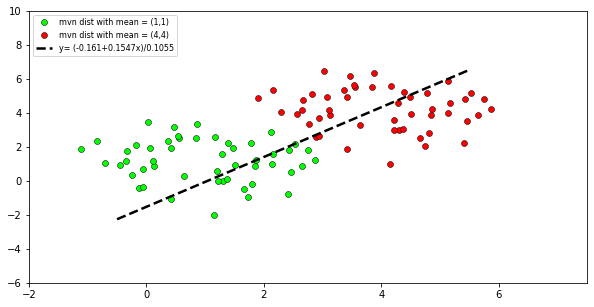

In [11]:
plt.rcParams['figure.figsize']=10,5
plt.plot(data1[:,0],data1[:,1], 'o', c='lime',markeredgewidth = 0.5, markeredgecolor = 'black')
plt.plot(data2[:,0],data2[:,1], 'o', c='red',markeredgewidth = 0.5, markeredgecolor = 'black')
x2_cord = np.linspace(-0.5,5.5,1000)
y2_cord = (b0 + b1 * x2_cord) / b2
plt.plot(x2_cord, y2_cord, '--', c="black", linewidth= 2.5)
plt.legend(["mvn dist with mean = (1,1)", "mvn dist with mean = (4,4)", f"y= ({round(b0, 4)}+{round(b1, 4)}x)/{round(b2, 4)}"],loc='upper left', fontsize= 8)
plt.xlim(-2, 7.5)
plt.ylim(-6, 10)
plt.show()

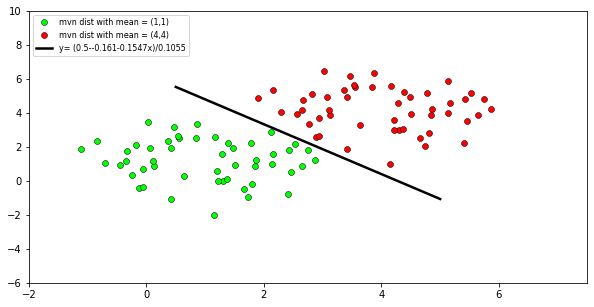

In [12]:
plt.rcParams['figure.figsize']=10,5
plt.plot(data1[:,0],data1[:,1], 'o', c='lime',markeredgewidth = 0.5, markeredgecolor = 'black')
plt.plot(data2[:,0],data2[:,1], 'o', c='red',markeredgewidth = 0.5, markeredgecolor = 'black')
x1_cord = np.linspace(0.5,5,1000)
y1_cord = (0.5 - b0 - b1 * x1_cord) / b2
plt.plot(x1_cord, y1_cord, '-', c="black", linewidth= 2.5)
plt.legend(["mvn dist with mean = (1,1)", "mvn dist with mean = (4,4)", f"y= (0.5-{round(b0, 4)}-{round(b1, 4)}x)/{round(b2, 4)}"],loc='upper left', fontsize= 8)
plt.xlim(-2, 7.5)
plt.ylim(-6, 10)
plt.show()

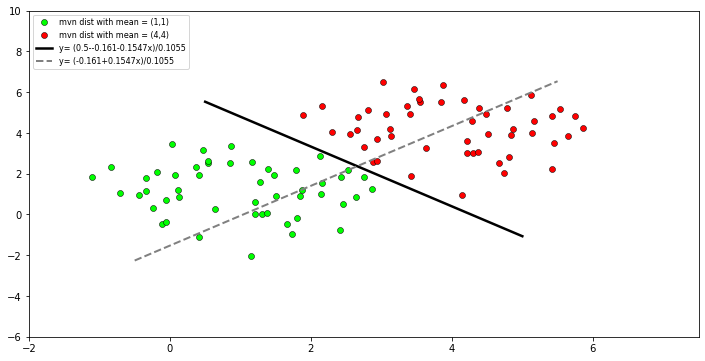

In [20]:
plt.rcParams['figure.figsize']=12,6
plt.plot(data1[:,0],data1[:,1], 'o', c='lime',markeredgewidth = 0.5, markeredgecolor = 'black')
plt.plot(data2[:,0],data2[:,1], 'o', c='red',markeredgewidth = 0.5, markeredgecolor = 'black')
x1_cord = np.linspace(0.5,5,1000)
x2_cord = np.linspace(-0.5,5.5,1000)
y1_cord = (0.5 - b0 - b1 * x1_cord) / b2
y2_cord = (b0 + b1 * x2_cord) / b2
plt.plot(x1_cord, y1_cord, '-', c="black", linewidth= 2.5)
plt.plot(x2_cord, y2_cord, '--', c="grey", linewidth= 2)
plt.legend(["mvn dist with mean = (1,1)", "mvn dist with mean = (4,4)", f"y= (0.5-{round(b0, 4)}-{round(b1, 4)}x)/{round(b2, 4)}", f"y= ({round(b0, 4)}+{round(b1, 4)}x)/{round(b2, 4)}"],loc='upper left', fontsize= 8)
plt.xlim(-2, 7.5)
plt.ylim(-6, 10)
plt.show()

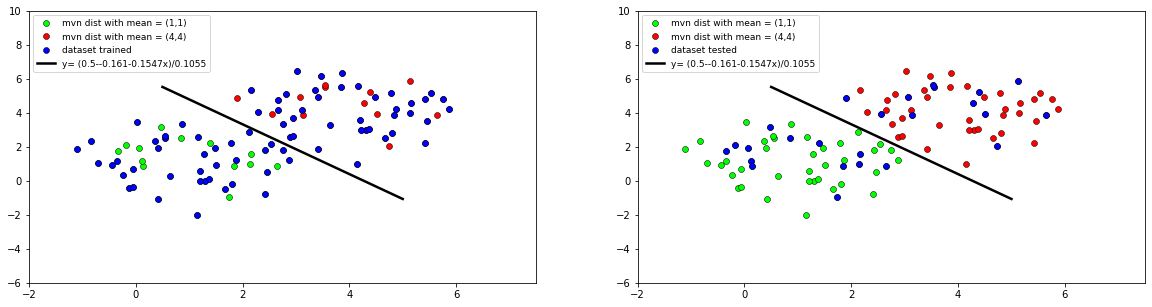

In [17]:
plt.rcParams['figure.figsize']=20,5
data3 = X_test.values
data4 = X_train.values
plt.subplot(1, 2, 1)
plt.plot(data1[:,0],data1[:,1], 'o', c='lime',markeredgewidth = 0.5, markeredgecolor = 'black')
plt.plot(data2[:,0],data2[:,1], 'o', c='red',markeredgewidth = 0.5, markeredgecolor = 'black')
plt.plot(data4[:,0],data4[:,1], 'o', c='blue',markeredgewidth = 0.5, markeredgecolor = 'black')
x_cord = np.linspace(0.5,5,1000)
y_cord = (0.5 - b0 - b1 * x_cord) / b2
plt.plot(x_cord, y_cord, "-", c="black", linewidth= 2.5)
plt.legend(["mvn dist with mean = (1,1)", "mvn dist with mean = (4,4)", "dataset trained", f"y= (0.5-{round(b0, 4)}-{round(b1, 4)}x)/{round(b2, 4)}"],loc='upper left', fontsize= 9)
plt.xlim(-2, 7.5)
plt.ylim(-6, 10)

plt.subplot(1, 2, 2)
plt.plot(data1[:,0],data1[:,1], 'o', c='lime',markeredgewidth = 0.5, markeredgecolor = 'black')
plt.plot(data2[:,0],data2[:,1], 'o', c='red',markeredgewidth = 0.5, markeredgecolor = 'black')
plt.plot(data3[:,0],data3[:,1], 'o', c='blue',markeredgewidth = 0.5, markeredgecolor = 'black')
x_cord = np.linspace(0.5,5,1000)
y_cord = (0.5 - b0 - b1 * x_cord) / b2
plt.plot(x_cord, y_cord, "-", c="black", linewidth= 2.5)
plt.legend(["mvn dist with mean = (1,1)", "mvn dist with mean = (4,4)", "dataset tested", f"y= (0.5-{round(b0, 4)}-{round(b1, 4)}x)/{round(b2, 4)}"],loc='upper left', fontsize= 9)
plt.xlim(-2, 7.5)
plt.ylim(-6, 10)
plt.show()

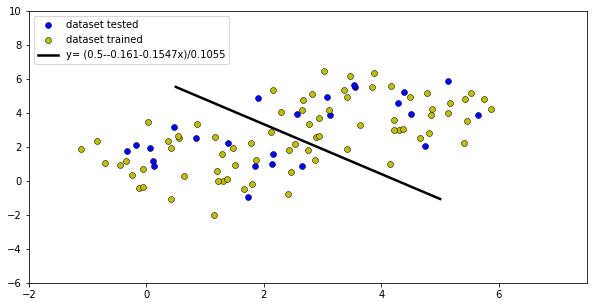

In [16]:
plt.rcParams['figure.figsize']=10,5
plt.plot(data3[:,0],data3[:,1], 'o', c='b',markeredgewidth = 0.5, markeredgecolor = 'black')
plt.plot(data4[:,0],data4[:,1], 'o', c='y',markeredgewidth = 0.5, markeredgecolor = 'black')
x_cord = np.linspace(0.5,5,1000)
y_cord = (0.5 - b0 - b1 * x_cord) / b2
plt.plot(x_cord, y_cord, '-', c="black", linewidth= 2.5)
plt.legend(["dataset tested", "dataset trained", f"y= (0.5-{round(b0, 4)}-{round(b1, 4)}x)/{round(b2, 4)}"],loc='upper left')
plt.xlim(-2, 7.5)
plt.ylim(-6, 10)
plt.show()